In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.font_manager as fm

kaggle의 tripadvisor의 리뷰데이터이다. 리뷰를 이용하여 별 점수인 Rating을 맞출려고 한다

In [ ]:
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')

In [ ]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
for i in df['Review']:
    i.strip()

In [ ]:
df['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

strip은 공백을 제거를 해준다.

In [ ]:
for i in df['Review']:
    if i.isupper():
        print('here i am')
# 대문자 없음

In [ ]:
df.duplicated().sum()  # 중복 없음

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

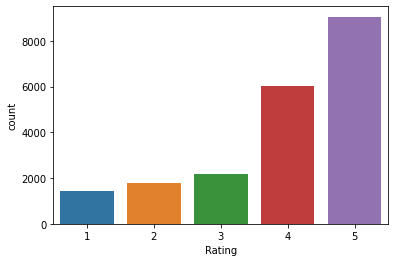

In [ ]:
sns.countplot(x= df['Rating'])

In [2]:
# Rating이 얼마나 분포가 되어있는지 확인해보기

In [ ]:
print(len(df[df['Rating'] == 1]) / len(df['Rating'])*100)  #7%
print(len(df[df['Rating'] == 2]) / len(df['Rating'])*100)   # 9%
print(len(df[df['Rating'] == 3]) / len(df['Rating'])*100)  # 11
print(len(df[df['Rating'] == 4]) / len(df['Rating'])*100)  # 29
print(len(df[df['Rating'] == 5]) / len(df['Rating'])*100) # 44

6.934751842272218
8.75018300717388
10.658337806842027
29.47147528183105
44.185252061880824


In [ ]:
df_len1 = df[df['Rating']==1]['Review'].str.len()

In [3]:
# 4,5점대를 긍정으로 1,2점대는 부정으로 바꾸기

In [ ]:
pos = [4,5]
nag = [1,2,3]

In [ ]:
def motion(rating):
    if rating in pos:
      return 2
    elif rating == 3:
      return 1
    else: 
        return 0

In [ ]:
df['motion'] = df['Rating'].apply(motion)

In [ ]:
df['motion'].value_counts()

2    15093
0     3214
1     2184
Name: motion, dtype: int64

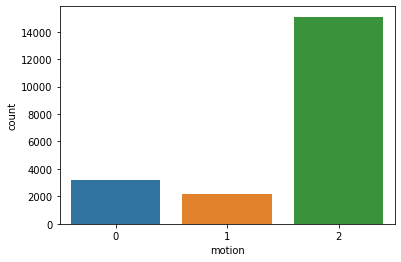

In [ ]:
sns.countplot(x = df['motion'])

In [ ]:
print(len(df[df['motion'] == 0]) / len(df['motion'])*100)  #15
print(len(df[df['motion'] == 1]) / len(df['motion'])*100)  # 10
print(len(df[df['motion'] == 2]) / len(df['motion'])*100)  # 75

15.684934849446098
10.658337806842027
73.65672734371186


In [4]:
# spacy는 영어를 인식하는 패키지

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
df['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [5]:
# spacy로 언어를 인식을 하여 토큰화

In [ ]:
def tokenize(en_text):
    return [tok.text for tok in nlp.tokenizer(en_text)]

In [6]:
# .,띄어쓰기 등을 없애준다

In [ ]:
def normalize(msg):
    doc = nlp(msg)
    res = []
    
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_space):
            pass
        else:
            res.append(token.lemma_.lower())
    res_str = ' '.join(res)
    return res_str

In [ ]:
import time 

In [ ]:
df['Review1'] = df["Review"].apply(normalize)

In [ ]:
df['Review1'] = df['Review1'].apply(str)

In [ ]:
df['Review1'][0]

'nice hotel expensive parking get good deal stay hotel anniversary arrive late evening take advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable wake stiff neck high pillow soundproof like hear music room night morning loud bang door open closing hear people talk hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch take advantage stay long location great walking distance shopping overall nice experience having pay 40 parking night'

# wordcloud

In [7]:
# wordcloud로 언어가 얼마나 분포가 되어있는지 확인 

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [8]:
# hotel이라는 말이 많이 들어가니 stopword에서 빼준다
# 데이터에 있는 언어들을 단어끼리 분류

In [ ]:
stop_words = ['hotel']
text = [i for i in df['Review1']]
text_tok = ' '.join(text).split()

In [ ]:
text_all = [i for i in text_tok if i not in stop_words]

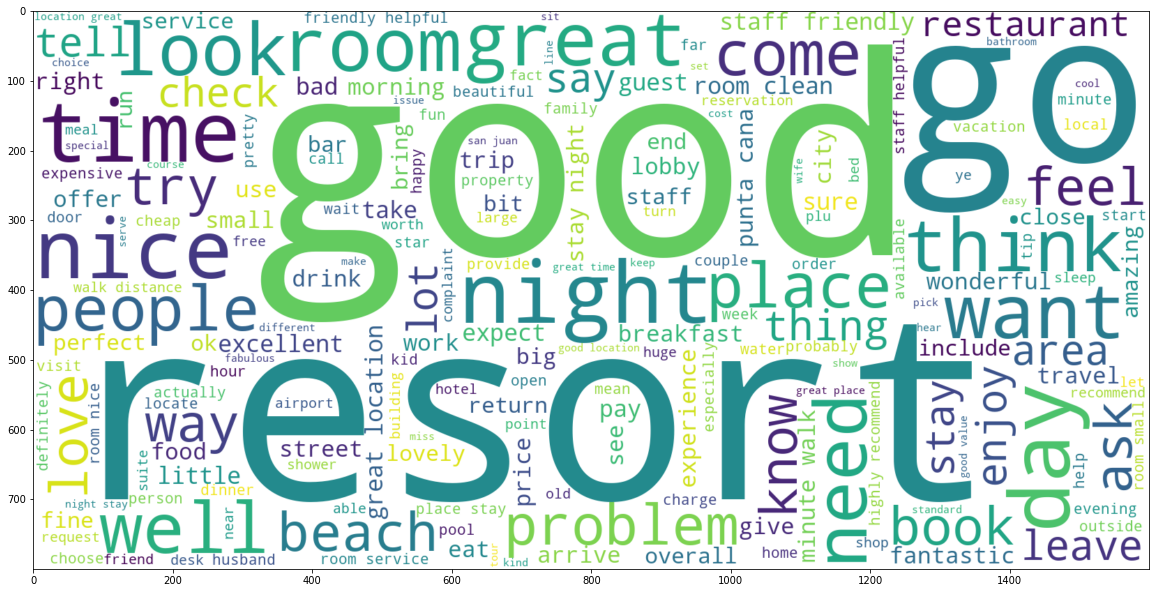

In [ ]:
plt.figure(figsize=(20,20)) # 시각화 크기 설정
wc = WordCloud(max_words = 200, width = 1600,height = 800, background_color='white',
               stopwords = STOPWORDS).generate(' '.join(text_all))
plt.imshow(wc,interpolation='bilinear')

In [9]:
# 가장 많은 순서대로 30개

In [ ]:
Counter(text_all).most_common(30)

[('room', 46612),
 ('stay', 27744),
 ('good', 21519),
 ('great', 21283),
 ('staff', 16375),
 ('night', 14168),
 ('day', 13035),
 ('nice', 12970),
 ('time', 12197),
 ('location', 11254),
 ('service', 10682),
 ('clean', 10609),
 ('restaurant', 10221),
 ('beach', 10161),
 ('breakfast', 9707),
 ('place', 9704),
 ('walk', 9554),
 ('like', 9346),
 ('food', 9305),
 ('resort', 8938),
 ('go', 8386),
 ('pool', 8382),
 ('bed', 7621),
 ('get', 7194),
 ('small', 7098),
 ('area', 7051),
 ('friendly', 6859),
 ('people', 6806),
 ('bar', 6805),
 ('want', 6515)]

In [10]:
# 부정적인것을 어떤 단어들이 분포가 되어있는지 확인

In [ ]:
df_0 = df[df['motion']==0]

text_0= [i for i in df_0['Review1']]
text_tok_0 = ' '.join(text_0).split()

stop_words = ['hotel']
text0 = [i for i in text_tok_0 if i not in stop_words]

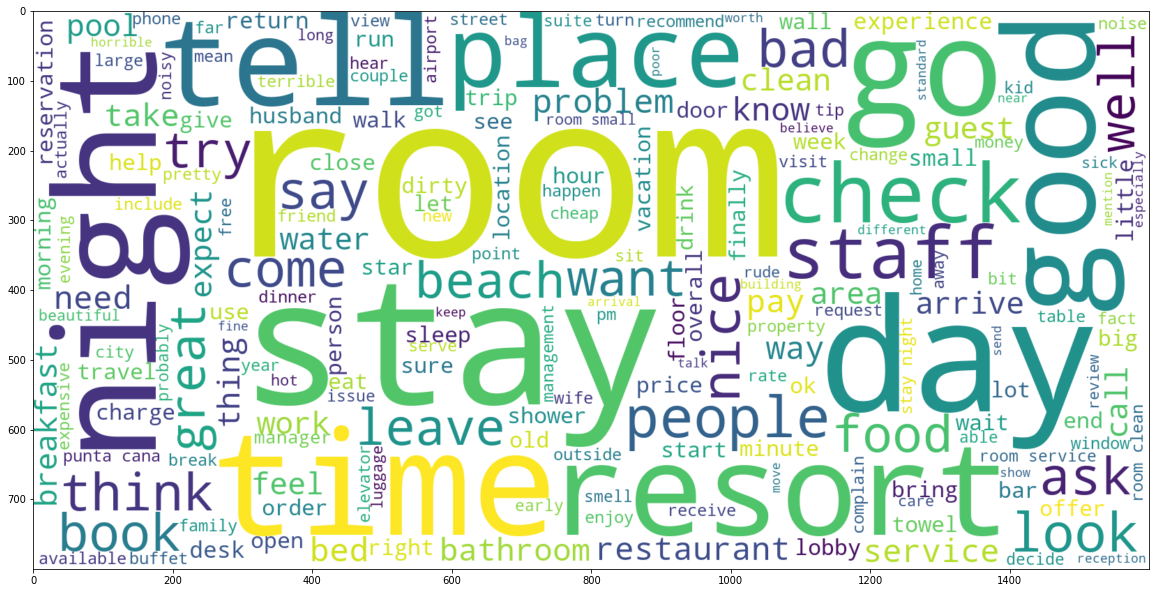

In [ ]:
plt.figure(figsize=(20,20)) # 시각화 크기 설정
wc = WordCloud(max_words = 200, width = 1600,height = 800, background_color='white',
               stopwords = STOPWORDS).generate(' '.join(text0))
plt.imshow(wc,interpolation='bilinear')

In [ ]:
Counter(text0).most_common(30)

[('room', 9845),
 ('stay', 4461),
 ('day', 2760),
 ('night', 2718),
 ('good', 2602),
 ('staff', 2281),
 ('service', 2199),
 ('time', 2190),
 ('go', 1869),
 ('like', 1831),
 ('resort', 1815),
 ('food', 1743),
 ('tell', 1742),
 ('place', 1623),
 ('check', 1585),
 ('beach', 1583),
 ('bed', 1567),
 ('bad', 1559),
 ('get', 1551),
 ('nice', 1522),
 ('people', 1391),
 ('desk', 1387),
 ('book', 1372),
 ('ask', 1320),
 ('restaurant', 1306),
 ('clean', 1280),
 ('pay', 1268),
 ('great', 1254),
 ('look', 1232),
 ('pool', 1224)]

In [11]:
# 3점대의 어떤 단어들이 분포가 되어있는지 확인

In [ ]:
df_1 = df[df['motion']==1]
text_1= [i for i in df_1['Review1']]
text_tok_1 = ' '.join(text_1).split()

stop_words = ['hotel','room']
text_1 = [i for i in text_tok_1 if i not in stop_words]

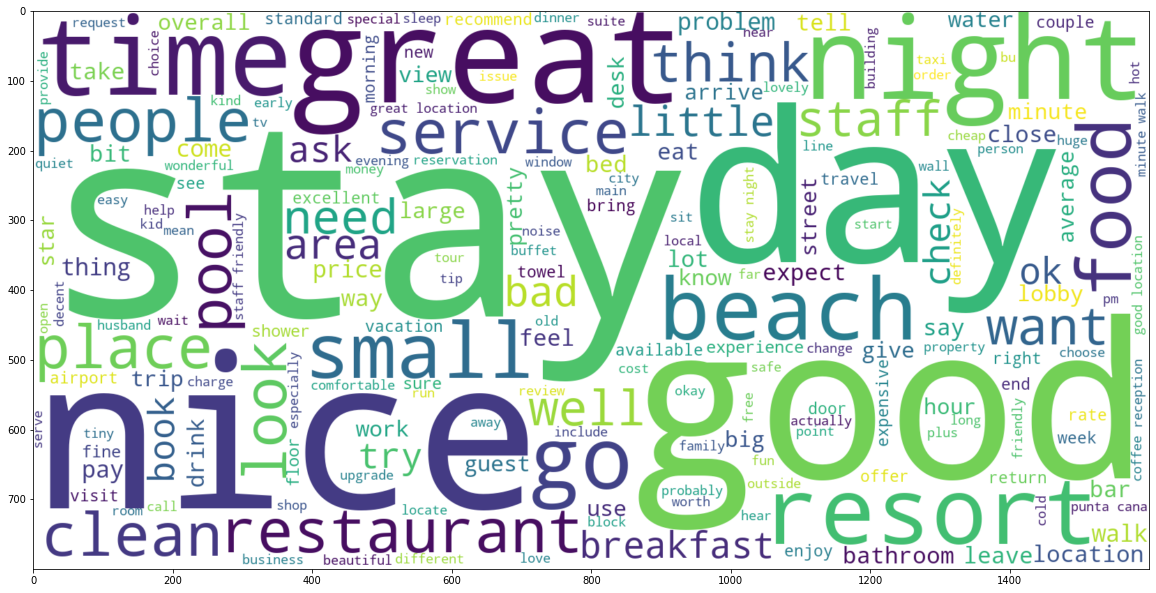

In [ ]:
plt.figure(figsize=(20,20)) # 시각화 크기 설정
wc = WordCloud(max_words = 200, width = 1600,height = 800, background_color='white',
               stopwords = STOPWORDS).generate(' '.join(text_1))
plt.imshow(wc,interpolation='bilinear')

In [ ]:
Counter(text_1).most_common(30)

[('good', 2836),
 ('stay', 2695),
 ('nice', 1824),
 ('great', 1775),
 ('night', 1753),
 ('day', 1498),
 ('staff', 1497),
 ('location', 1431),
 ('time', 1392),
 ('beach', 1338),
 ('clean', 1318),
 ('like', 1272),
 ('resort', 1219),
 ('food', 1196),
 ('service', 1188),
 ('restaurant', 1158),
 ('pool', 1121),
 ('place', 1077),
 ('breakfast', 1041),
 ('small', 1033),
 ('walk', 1026),
 ('get', 997),
 ('go', 975),
 ('area', 947),
 ('bed', 946),
 ('people', 861),
 ('price', 846),
 ('bar', 818),
 ('little', 801),
 ('look', 796)]

In [12]:
# 긍정의 단어들을 확인

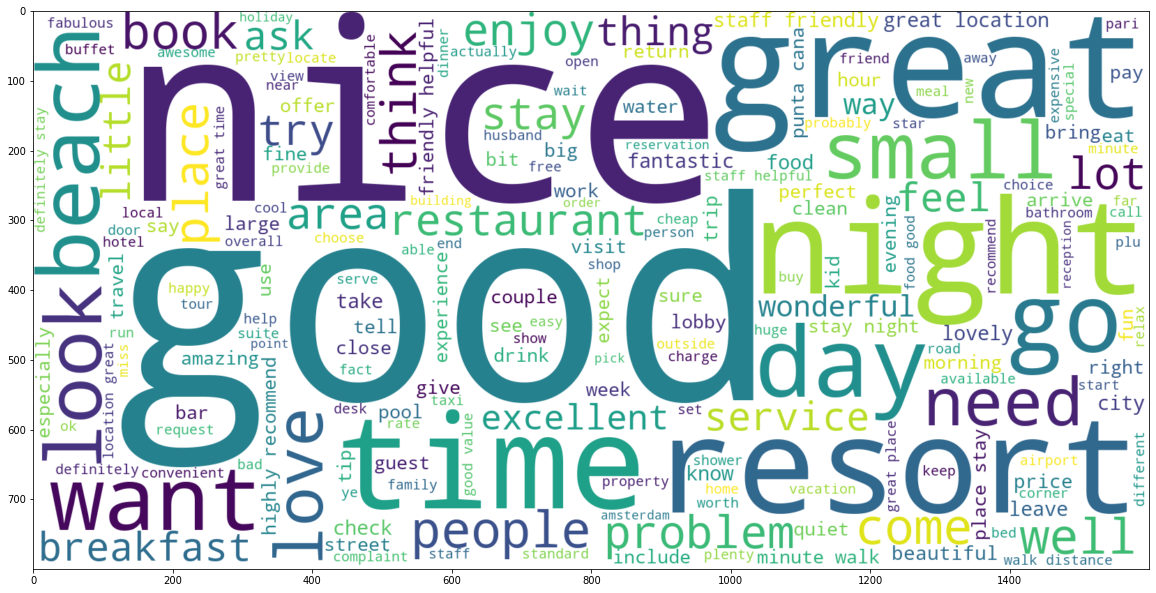

In [ ]:
df_2 = df[df['motion']==2]
text_2= [i for i in df_2['Review1']]
text_tok_2 = ' '.join(text_2).split()

stop_words = ['hotel','room']
text_2 = [i for i in text_tok_2 if i not in stop_words]
plt.figure(figsize=(20,20)) # 시각화 크기 설정
wc = WordCloud(max_words = 200, width = 1600,height = 800, background_color='white',
               stopwords = STOPWORDS).generate(' '.join(text_2))
plt.imshow(wc,interpolation='bilinear')

In [ ]:
Counter(text_2).most_common(30)

[('stay', 20588),
 ('great', 18254),
 ('good', 16081),
 ('staff', 12597),
 ('night', 9697),
 ('nice', 9624),
 ('location', 8879),
 ('day', 8777),
 ('time', 8615),
 ('clean', 8011),
 ('restaurant', 7757),
 ('walk', 7660),
 ('breakfast', 7593),
 ('service', 7295),
 ('beach', 7240),
 ('place', 7004),
 ('food', 6366),
 ('like', 6243),
 ('pool', 6037),
 ('resort', 5904),
 ('friendly', 5711),
 ('go', 5542),
 ('excellent', 5397),
 ('area', 5180),
 ('bed', 5108),
 ('bar', 5096),
 ('recommend', 5020),
 ('small', 4978),
 ('little', 4736),
 ('helpful', 4721)]

# H-Gram

In [13]:
# h-gram은 h = 숫자 , 단어들을 묶어준다. 묶여서 얼마나 많은 단어들이 나오는지 확인 할 수 있다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
import seaborn as sns

# H-Gram 설정 정의 함수

def get_top_text_ngram(corpus,n,g):
    vec = CountVectorizer(ngram_range=(g,g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)
    return words_freq[:n]

In [14]:
# 단어들을 3개씩 묶었을때 가장 많이 나온 단어들
# 전체

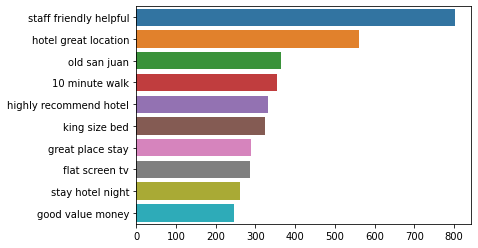

In [ ]:
t_all = get_top_text_ngram(text,10,3)
t_all = dict(t_all)
sns.barplot(x = list(t_all.values()),y = list(t_all.keys()))

In [15]:
# 부정적

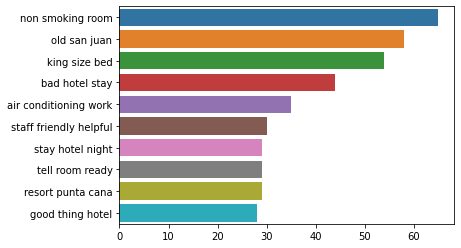

In [ ]:
# motion = 0
t_0 = get_top_text_ngram(text_0,10,3)
t_0 = dict(t_0)
sns.barplot(x = list(t_0.values()),y = list(t_0.keys()))

In [16]:
# 3점대

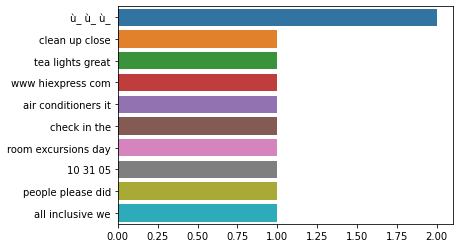

In [ ]:
# motion  =1
t_1 = get_top_text_ngram(text_1,10,3)
t_1 = dict(t_1)
sns.barplot(x = list(t_1.values()),y = list(t_1.keys()))

# Topic화

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
count_vectorizer =  CountVectorizer(max_df = 0.1, max_features= 1000, min_df= 2, ngram_range= (1,2))
feat_vect = count_vectorizer.fit_transform(text_1)
print('CV:',feat_vect.shape)

CV: (224661, 1000)


In [ ]:
lda = LatentDirichletAllocation(n_components= 5) # 5개 주제로 묶음
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=5)

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]  # argsort : array sort
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])


        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word를 10개만 추출
# print(display_topics(lda, feature_names, 10))
print(display_topics(lda, feature_names, 5))

Topic # 0
good stay night staff day
Topic # 1
time clean pool breakfast get
Topic # 2
service restaurant place walk go
Topic # 3
nice great location resort small
Topic # 4
beach like bed want bad
None


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from numpy.core.fromnumeric import argmax
doc_topic = lda.transform(feat_vect)

doc_per_topic_list = []

for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n,topic_most_pr,topic_pr])

doc_topic_df = pd.DataFrame(doc_per_topic_list,columns = ['Doc_Num','Topic','Percentage'])
doc_topic_df.head()

,Doc_Num,Topic,Percentage
0,0,3,0.600000
1,1,0,0.200000
2,2,4,0.600000
3,3,0,0.200000
4,4,4,0.599999


In [ ]:
doc_topic.shape[0]

224661

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchtext.vocab import Vectors
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# Word2vec

In [17]:
# word2vec는 단어들끼리 연관성을 이어주고 가중치를 만들어 주는 모델

In [ ]:
len(text)

20491

In [ ]:
tex_tok  = df['Review1'].apply(tokenize)

In [ ]:
tex_tok

0        [nice, hotel, expensive, parking, get, good, d...
1        [ok, special, charge, diamond, member, hilton,...
2        [nice, room, 4, experience, hotel, monaco, sea...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, go, seahawk, game, ...
                               ...                        
20486    [well, keep, secret, 3rd, time, stay, charm, 5...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, look, nice, modern, outside, desk, staff,...
20489    [hotel, theft, ruin, vacation, hotel, open, se...
20490    [people, talk, believe, excellent, rating, hot...
Name: Review1, Length: 20491, dtype: object

In [ ]:
model = Word2Vec(sentences=tex_tok, window=5, min_count=5, workers=4, sg=0)
model.wv.vectors.shape

(12870, 100)

In [ ]:
model_result = model.wv.most_similar(["stay"])
print(model_result)

[('stayed', 0.7478893995285034), ('staying', 0.6550357341766357), ('october', 0.6537601351737976), ('intercontinental', 0.649993896484375), ('2005', 0.6483799815177917), ('november', 0.646145224571228), ('august', 0.6449947357177734), ('2007', 0.6402779817581177), ('2006', 0.6339796185493469), ('2004', 0.6291541457176208)]


#  Embedding

In [ ]:
from torch.utils.data import IterableDataset

In [ ]:
import torch.nn as nn
embedding_layer = nn.Embedding(num_embeddings=len(text), 
                               embedding_dim=3,
                               padding_idx=1)

In [ ]:
embedding_layer

Embedding(20491, 3, padding_idx=1)

Embedding 

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
#model.wv.save_word2vec_format('eng_w2v')  # model에서 학습시킨 값을 저장 

In [ ]:
word2vec_model = KeyedVectors.load_word2vec_format('eng_w2v') # model 에서 학습을 로드

In [ ]:
print(word2vec_model['hotel']) #  단어 embedding  한거 확인

[-1.8377866   0.4567381  -0.3848345   0.3076266   0.8820614  -1.3531263
 -0.06918494  0.94841135  0.55098414 -0.38362914  0.20609128 -0.08489936
  0.29992396  0.5564585  -1.2900804  -0.8268281  -0.68885106  0.3644157
 -0.82219833 -0.08349913 -0.49514624 -0.5463508   0.20930472 -0.07559267
  0.14299043 -2.0846782   0.63902974  0.79393476 -1.6514488   1.6495731
  0.48087823  0.2887141  -0.81348336  0.6746017   0.4392659  -0.34817025
  0.45163897 -0.55141383 -0.01614369  0.44480914 -0.6732      0.78394526
 -0.11062601 -1.3351233   1.5028831  -1.0045139  -1.1715679  -0.01081462
 -0.55890834 -1.1212324   0.962934   -0.17654717 -1.0504454   0.58956796
  1.0703877  -0.7903878   0.14464095 -0.92438126  0.0568791   1.8167123
  0.2575736   0.40016958  0.6206894  -1.173149   -0.7477741   0.43939736
 -0.62179255  0.6634397  -0.8747648   1.0124785   0.05341248 -1.5014796
  0.5741843   0.96543103  0.52090156  1.1451699  -0.01355773  0.18666781
  1.8210454  -0.74292296  1.5136172  -1.4490718   0.0430

In [ ]:
vectors = Vectors(name="eng_w2v")

## word2vec을 weight 값으로 적용

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer

In [ ]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')
VOCAB_SIZE = len(tokenizer.index_word) + 1
EMBEDDING_DIM = 100
MAX_LENGTH = 1887
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))


In [ ]:
# tokenizer에 있는 단어 사전을 순회하면서 word2vec의 100차원 vector를 가져옵니다
for word, idx in tokenizer.word_index.items():
    embedding_vector = word2vec_model[word] if word in word2vec_model else None
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector
        
embedding_matrix.shape

(1, 100)

In [ ]:
df['motion']

0        2
1        0
2        1
3        2
4        2
        ..
20486    2
20487    2
20488    0
20489    0
20490    0
Name: motion, Length: 20491, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek 
import random

In [ ]:
random.seed(1)

In [ ]:
X = df['Review1']
y = df['motion']
undersample = RandomUnderSampler(sampling_strategy='majority')
smonn = SMOTEENN(random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

X_train1= X_train.to_numpy().reshape(-1, 1) # undersampling 을 하기 위해 재배열
X_test1 = X_test.to_numpy().reshape(-1, 1)


X_under, y_under = undersample.fit_resample(X_train1, y_train)   # undersampling




X_under1 = np.ravel(X_under)   # 신경망을 돌리기 위해 배열을 1차원으로 만듬
y_under1 = np.ravel(X_test1)

In [ ]:
Counter(y_under)

Counter({0: 2556, 1: 1776, 2: 1776})

In [ ]:
X_under.shape

(6108, 1)

In [ ]:
y_under.shape

(6108,)

model =  tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, 
                    EMBEDDING_DIM, 
                    input_length=INPUT_LENGTH, 
                    weights=[embedding_matrix], # weight는 바로 위의 
embedding_matrix 대입
                    trainable=False # embedding layer에 대한 train은 꼭 false로 지정
                   )
         )
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, recurrent_dropout=0.1)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer

tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)
#print(tokenizer.word_index)
total_word = len(tokenizer.word_index)
#print('Total distinct words: {}'.format(total_word))




train_seq = tokenizer.texts_to_sequences(X_under1)
train_padded = pad_sequences(train_seq,maxlen = MAX_LENGTH) # 최대값을 설정해줘야한다.

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq,maxlen = MAX_LENGTH)

#One hot encoding the label 원핫코딩을 왜 하는거지?
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_under)
test_labels = lb.transform(y_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

# 신경망

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(VOCAB_SIZE, 
                    EMBEDDING_DIM, 
                    input_length=MAX_LENGTH, 
                    weights=[embedding_matrix], # weight는 바로 위의 embedding_matrix 대입
                    trainable=False # embedding layer에 대한 train은 꼭 false로 지정
                  ),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    
                                    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

In [ ]:
model1 = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model1.summary()

In [ ]:
random.seed(1)

In [ ]:
model1.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# categorical_crossentropy : 원핫 코딩을 했을때 , sparse_categorical_crossentropy: 정수일때 
model1.fit(train_padded, train_labels, epochs=25, validation_data=(test_padded, test_labels))

Epoch 1/25
166/166 [==============================] - 30s 162ms/step - loss: 1.1110 - accuracy: 0.3311 - val_loss: 1.1178 - val_accuracy: 0.1010
Epoch 2/25
166/166 [==============================] - 22s 131ms/step - loss: 1.1101 - accuracy: 0.3365 - val_loss: 1.1172 - val_accuracy: 0.1115
Epoch 3/25
166/166 [==============================] - 22s 131ms/step - loss: 1.1089 - accuracy: 0.3414 - val_loss: 1.1122 - val_accuracy: 0.1671
Epoch 4/25
166/166 [==============================] - 22s 135ms/step - loss: 1.1070 - accuracy: 0.3524 - val_loss: 1.1168 - val_accuracy: 0.1142
Epoch 5/25
166/166 [==============================] - 22s 130ms/step - loss: 1.1031 - accuracy: 0.3763 - val_loss: 1.1111 - val_accuracy: 0.3718
Epoch 6/25
166/166 [==============================] - 22s 134ms/step - loss: 1.0741 - accuracy: 0.4412 - val_loss: 1.0361 - val_accuracy: 0.7085
Epoch 7/25
166/166 [==============================] - 22s 130ms/step - loss: 1.0096 - accuracy: 0.5049 - val_loss: 0.9570 - val_ac

In [ ]:
pred2 = model1.predict(test_padded)
pred3 = model.predict(test_padded)

In [ ]:
true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)
pred1_labels = np.argmax(pred3,axis = -1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(true_labels, pred_labels))
print(confusion_matrix(true_labels,pred1_labels))
print(classification_report(true_labels, pred_labels))
print(classification_report(true_labels,pred1_labels))
# 1의 값이 적어서 학습이 잘 안되는것 같음

[[ 526   72   28]
 [ 188  106  120]
 [ 213  316 2530]]
[[   0  626    0]
 [   0  414    0]
 [   0 3059    0]]
              precision    recall  f1-score   support

           0       0.57      0.84      0.68       626
           1       0.21      0.26      0.23       414
           2       0.94      0.83      0.88      3059

    accuracy                           0.77      4099
   macro avg       0.58      0.64      0.60      4099
weighted avg       0.81      0.77      0.79      4099

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       626
           1       0.10      1.00      0.18       414
           2       0.00      0.00      0.00      3059

    accuracy                           0.10      4099
   macro avg       0.03      0.33      0.06      4099
weighted avg       0.01      0.10      0.02      4099



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
